# Markov Decision Processes & Reinforcement Learning

## Part1 - Value Iteration and Policy Iteration

In [130]:
import mdptoolbox as mdp
import mdptoolbox.example as mdpex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import networkx as nx

### Forest Management over 100 years

In [131]:
P, R = mdpex.forest(S=100, r1=9, r2=4, p=0.1)

In [132]:
# Value Iteration
vi = mdp.mdp.ValueIteration(P, R,0.9)
vi.run()
viPol = vi.policy
viVals = vi.V
viT = vi.time
viN = vi.iter
print("Value Iteration :\n----------------\n Policy ==>",viPol,"\n Expected Values ==>",
      viVals, "\n Time ==>",viT,"\n Iterations ==>", viN)

Value Iteration :
----------------
 Policy ==> (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
 Expected Values ==> (4.424067013443481, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.976617348419744, 4.

In [133]:
vp=[];vv=[];vt=[];vn=[];
for g in range(1,10,1):
    g1 = g/10
    print(g1)
    vi = mdp.mdp.ValueIteration(P, R,g1)
    vi.run()
    vp.append(vi.policy)
    vv.append(vi.V)
    vt.append(vi.time)
    vn.append(vi.iter)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


Text(33.0, 0.5, 'Year')

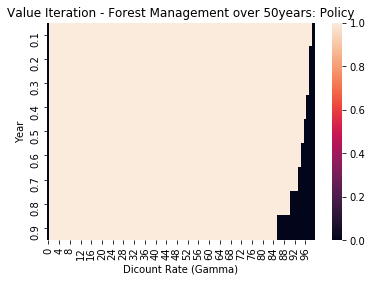

In [134]:
gv = [g/10 for g in range(1,10,1)]
d =pd.DataFrame(vp)
d.index=gv
sns.heatmap(d)
plt.title("Value Iteration - Forest Management over 50years: Policy")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Year")

Text(0, 0.5, 'Expected Values')

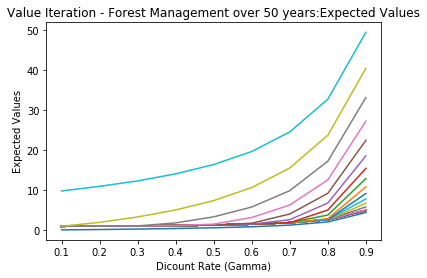

In [135]:
plt.plot(gv, vv)
plt.title("Value Iteration - Forest Management over 50 years:Expected Values")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Expected Values")

Text(0, 0.5, 'Time (Seconds)')

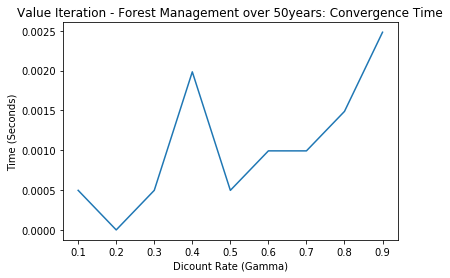

In [136]:
plt.plot(gv, vt)
plt.title("Value Iteration - Forest Management over 50years: Convergence Time")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")

Text(0, 0.5, 'Number of Iterations to Convergence')

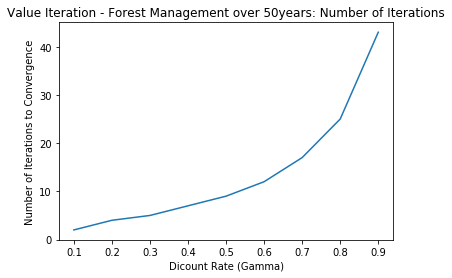

In [137]:
plt.plot(gv, vn)
plt.title("Value Iteration - Forest Management over 50years: Number of Iterations")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Number of Iterations to Convergence")

In [138]:
# Policy Iteration
pi = mdp.mdp.PolicyIteration(P, R,0.9)
pi.run()
piPol = pi.policy
piVals = pi.V
piT = pi.time
piN = pi.iter
print("Policy Iteration :\n----------------\n Policy ==>",piPol,"\n Expected Values ==>",
      piVals, "\n Time ==>",piT, "\n Iterations ==>",piN)

Policy Iteration :
----------------
 Policy ==> (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
 Expected Values ==> (4.475138121546961, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5.027624309392265, 5

In [139]:
pp=[];pv=[];pt=[];pn=[];
for g in range(1,10,1):
    g1 = g/10
    print(g1)
    pi = mdp.mdp.PolicyIteration(P, R,g1)
    pi.run()
    pp.append(pi.policy)
    pv.append(pi.V)
    pt.append(pi.time)
    pn.append(pi.iter)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


Text(33.0, 0.5, 'Year')

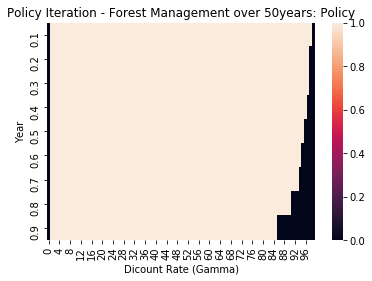

In [140]:
gv = [g/10 for g in range(1,10,1)]
e =pd.DataFrame(pp)
e.index=gv
sns.heatmap(e)
plt.title("Policy Iteration - Forest Management over 50years: Policy")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Year")

Text(0, 0.5, 'Expected Values')

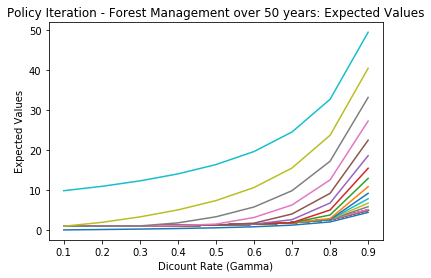

In [141]:
plt.plot(gv, pv)
plt.title("Policy Iteration - Forest Management over 50 years: Expected Values")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Expected Values")

Text(0, 0.5, 'Time (Seconds)')

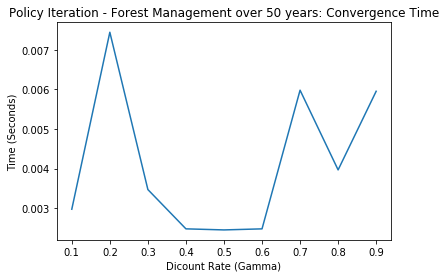

In [142]:
plt.plot(gv, pt)
plt.title("Policy Iteration - Forest Management over 50 years: Convergence Time")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")

Text(0, 0.5, 'Number of Iterations to Convergence')

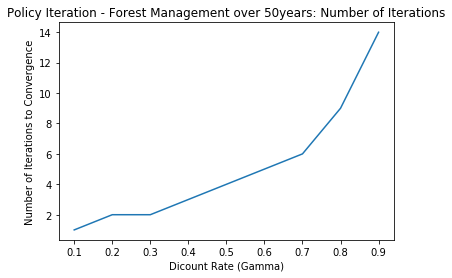

In [143]:
plt.plot(gv, pn)
plt.title("Policy Iteration - Forest Management over 50years: Number of Iterations")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Number of Iterations to Convergence")

In [144]:
# Q-Learning
ql = mdp.mdp.QLearning(P, R,0.9)
ql.run()
qlPol = ql.policy
qlVals = ql.V
qlT = ql.time
print("Q-Learning :\n Policy ==>",qlPol,"\n Expected Values ==>", qlVals, "\n Time ==>",qlT)

Q-Learning :
 Policy ==> (0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0) 
 Expected Values ==> (4.467302812304082, 5.015468667806413, 3.722785008666617, 4.714344451501592, 0.06517116725007314, 0.12513954133940342, 0.11020142673382609, 0.7175524606105967, 0.003333637432536123, 0.09794992946270265, 0.012641928422906396, 0.21031054618721476, 0.06671067539175875, 2.009812518074333e-06, 0.05137997874814093, 0.06237573998426597, 0.1973755383195987, 2.11648631905777e-05, 0.0037765426044350766, 0.16879327214394887, 0.24989667817374767, 7.843218350689789e-08, 3.4503043678331146e-05, 0.0050880033789602215, 0.29731467896133995, 0.24405389052700194, 0.009948528651140053, 0.36910275368043405, 0.0, 0.0, 0.0005187435864553164, 0.10685525240231128, 0.06

In [157]:
qp=[];qv=[];qt=[];qn=[];
for g in range(1,10,1):
    g1 = g/10
    print(g1)
    ql = mdp.mdp.QLearning(P, R,g1, n_iter=500000)
    ql.run()
    qp.append(ql.policy)
    qv.append(ql.V)
    qt.append(ql.time)
    #qn.append(ql.iter)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


Text(33.0, 0.5, 'Year')

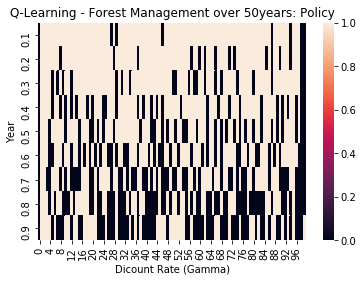

In [158]:
gv = [g/10 for g in range(1,10,1)]
f =pd.DataFrame(qp)
f.index=gv
sns.heatmap(f)
plt.title("Q-Learning - Forest Management over 50years: Policy")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Year")

Text(0, 0.5, 'Expected Values')

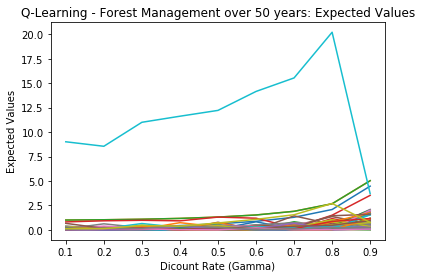

In [159]:
plt.plot(gv, qv)
plt.title("Q-Learning - Forest Management over 50 years: Expected Values")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Expected Values")

Text(0, 0.5, 'Time (Seconds)')

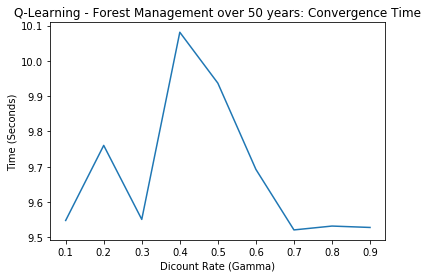

In [160]:
plt.plot(gv, qt)
plt.title("Q-Learning - Forest Management over 50 years: Convergence Time")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")

In [161]:
### Overall Comparison on Time, Iterations and Expected Values

Text(0, 0.5, 'Number of Iterations to Convergence')

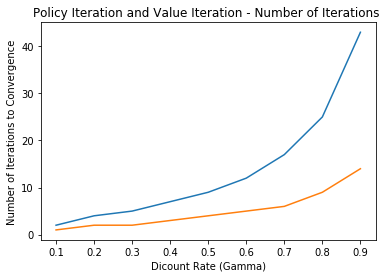

In [162]:
plt.plot(gv, vn)
plt.plot(gv, pn)
plt.title("Policy Iteration and Value Iteration - Number of Iterations ")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Number of Iterations to Convergence")

Text(0, 0.5, 'Time (Seconds)')

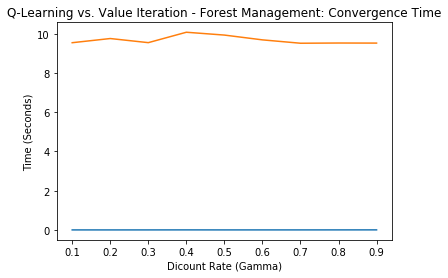

In [163]:
plt.plot(gv, vt)
#plt.plot(gv, pt)
plt.plot(gv, qt)
plt.title("Q-Learning vs. Value Iteration - Forest Management: Convergence Time")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")

Text(0, 0.5, 'Time (Seconds)')

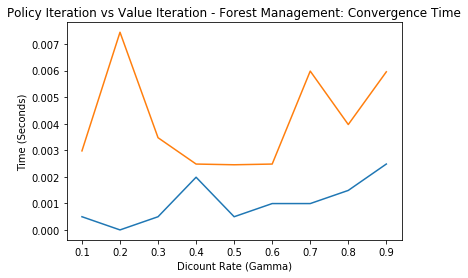

In [164]:
plt.plot(gv, vt)
plt.plot(gv, pt)
#plt.plot(gv, qt)
plt.title("Policy Iteration vs Value Iteration - Forest Management: Convergence Time")
plt.xlabel("Dicount Rate (Gamma)")
plt.ylabel("Time (Seconds)")